In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="2" #0,1,2
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import DatasetsPaco
# import TinySleepNet

from wandb.keras import WandbCallback

In [2]:
binary_labels = True
channels = ['F4']
batch_size = 64
dataset = DatasetsPaco.EDFData_TF_old("../Data/PSG1.edf", batch_size=batch_size, channels=channels, binary_labels=binary_labels)

In [3]:
labels_b = []
for a,b in dataset:
    labels_b.extend(b)
np.unique(labels_b), dataset.id_to_class_dict

(array([0, 1]), {0: 'Sleep stage R', 1: 'Sleep stage W'})

In [4]:
X_binary_raw = []
for X, Y in dataset:
    # temp = (X-dataset_b.mean)/dataset_b.std
    X_binary_raw.append(X.numpy())
    # break
X_binary_raw = np.vstack(X_binary_raw)

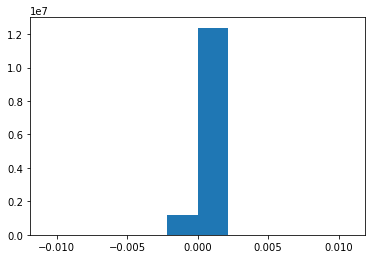

In [5]:
plt.figure()
plt.hist(X_binary_raw.flatten())
plt.show()

In [6]:
X_binary_std = []
for X, Y in dataset:
    temp = (X-dataset.mean)/dataset.std
    X_binary_std.append(temp.numpy())
    # break
X_binary_std = np.vstack(X_binary_std)

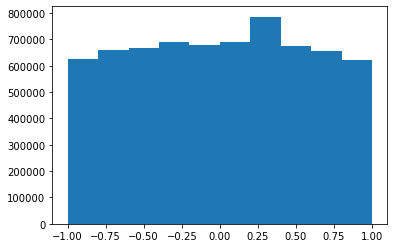

In [7]:
plt.figure()
plt.hist(X_binary_std.flatten(), range=[-1,1])
plt.show()

In [8]:
sr = int(dataset.sampling_rate)
num_epochs = 30
if binary_labels:
    classes = 2
else:
    classes = 5
sr, classes

(512, 2)

In [9]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(128, kernel_size=sr // 2, padding='same', strides=sr // 4, activation="relu",
                               data_format='channels_last',
                               input_shape=(15360,1)),  # 15360 / 128 = 120
        tf.keras.layers.MaxPooling1D(8),
        # tf.keras.layers.Dropout(0.5),
        # tf.keras.layers.Conv1D(128, kernel_size=8, padding='same', strides=1, activation="relu",
        #                        data_format='channels_last'),
        # tf.keras.layers.Conv1D(128, kernel_size=8, padding='same', strides=1, activation="relu",
        #                        data_format='channels_last'),
        # tf.keras.layers.Conv1D(128, kernel_size=8, padding='same', strides=1, activation="relu",
        #                        data_format='channels_last'),
        # tf.keras.layers.MaxPooling1D(4),
        # tf.keras.layers.Dropout(0.5),
        # tf.keras.layers.LSTM(128),
        # tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(classes, activation="softmax")
    ])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 120, 128)          32896     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 15, 128)           0         
_________________________________________________________________
flatten (Flatten)            (None, 1920)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 3842      
Total params: 36,738
Trainable params: 36,738
Non-trainable params: 0
_________________________________________________________________


In [11]:
# model = TinySleepNet.TinySleepNet(sampling_rate=sr, channels=len(channels), classes=classes)
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [12]:
history = model.fit(X_binary_raw, np.array(labels_b), epochs=num_epochs)

Epoch 1/30
28/28 [==============================] - 0s 14ms/step - loss: 0.6326 - accuracy: 0.7211
Epoch 2/30
28/28 [==============================] - 0s 13ms/step - loss: 0.5958 - accuracy: 0.7211
Epoch 3/30
28/28 [==============================] - 0s 15ms/step - loss: 0.5928 - accuracy: 0.7211
Epoch 4/30
28/28 [==============================] - 0s 15ms/step - loss: 0.5933 - accuracy: 0.7211
Epoch 5/30
28/28 [==============================] - 0s 15ms/step - loss: 0.5953 - accuracy: 0.7211
Epoch 6/30
28/28 [==============================] - 0s 14ms/step - loss: 0.5933 - accuracy: 0.7211
Epoch 7/30
28/28 [==============================] - 0s 14ms/step - loss: 0.5932 - accuracy: 0.7211
Epoch 8/30
28/28 [==============================] - 0s 14ms/step - loss: 0.5919 - accuracy: 0.7211
Epoch 9/30
28/28 [==============================] - 0s 14ms/step - loss: 0.5925 - accuracy: 0.7211
Epoch 10/30
28/28 [==============================] - 0s 15ms/step - loss: 0.5953 - accuracy: 0.7211
Epoch 11/

In [13]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(128, kernel_size=sr // 2, padding='same', strides=sr // 4, activation="relu",
                               data_format='channels_last',
                               input_shape=(15360,1)),  # 15360 / 128 = 120
        tf.keras.layers.MaxPooling1D(8),
        # tf.keras.layers.Dropout(0.5),
        # tf.keras.layers.Conv1D(128, kernel_size=8, padding='same', strides=1, activation="relu",
        #                        data_format='channels_last'),
        # tf.keras.layers.Conv1D(128, kernel_size=8, padding='same', strides=1, activation="relu",
        #                        data_format='channels_last'),
        # tf.keras.layers.Conv1D(128, kernel_size=8, padding='same', strides=1, activation="relu",
        #                        data_format='channels_last'),
        # tf.keras.layers.MaxPooling1D(4),
        # tf.keras.layers.Dropout(0.5),
        # tf.keras.layers.LSTM(128),
        # tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(classes, activation="softmax")
    ])

In [14]:
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [15]:
history = model.fit(X_binary_std, np.array(labels_b), epochs=num_epochs)

Epoch 1/30
28/28 [==============================] - 0s 10ms/step - loss: 0.9199 - accuracy: 0.6077
Epoch 2/30
28/28 [==============================] - 0s 10ms/step - loss: 0.9704 - accuracy: 0.6780
Epoch 3/30
28/28 [==============================] - 0s 10ms/step - loss: 0.7616 - accuracy: 0.6893
Epoch 4/30
28/28 [==============================] - 0s 13ms/step - loss: 0.6926 - accuracy: 0.7075
Epoch 5/30
28/28 [==============================] - 0s 15ms/step - loss: 0.6006 - accuracy: 0.7154
Epoch 6/30
28/28 [==============================] - 0s 15ms/step - loss: 0.5291 - accuracy: 0.7608
Epoch 7/30
28/28 [==============================] - 0s 16ms/step - loss: 0.5158 - accuracy: 0.7608
Epoch 8/30
28/28 [==============================] - 0s 14ms/step - loss: 0.5152 - accuracy: 0.7698
Epoch 9/30
28/28 [==============================] - 0s 15ms/step - loss: 0.4888 - accuracy: 0.7664
Epoch 10/30
28/28 [==============================] - 0s 16ms/step - loss: 0.4030 - accuracy: 0.8379
Epoch 11/